# comment in each code cell
# modularity of code
# github commits regular
# EDA and visualisation
# hyper parameter tuning
# proper output formatting
# final summary or conclusion
# number of model experimented
# prediction and calculate some evaluation matrix for model
# video presentation 
# accuracy grammar and PPT
# summary and final documentation
# 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
import datetime as dt
import matplotlib.dates as mdates
import requests

In [2]:
yes=pd.read_csv("yesbank.csv",index_col="Date")
yes.head(3)

,Open,High,Low,Close
Date,,,,
Jul-05,13.00,14.00,11.25,12.46
Aug-05,12.58,14.88,12.55,13.42
Sep-05,13.48,14.87,12.27,13.30


In [3]:
yes.info()
yes.columns

<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, Jul-05 to Nov-20
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    185 non-null    float64
 1   High    185 non-null    float64
 2   Low     185 non-null    float64
 3   Close   185 non-null    float64
dtypes: float64(4)
memory usage: 7.2+ KB


Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [4]:
yes.shape

(185, 4)

In [5]:
yes.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

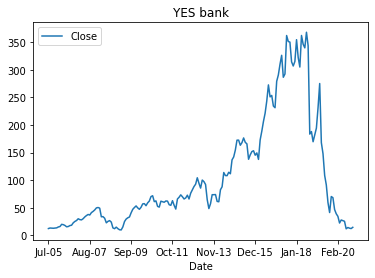

In [6]:

yes[["Close"]].plot()
plt.title("YES bank")
plt.show


In [7]:
num=yes.select_dtypes(include='number')

# scaling

In [8]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()

In [9]:
#scaled=ss.fit_transform(yes)

In [10]:
#scalled=pd.DataFrame(scaled,columns=['Open', 'High', 'Low', 'Close'])

In [11]:
#scalled

In [12]:
target=yes['Close']

In [13]:
yes1=yes.drop('Close',axis=1)

In [20]:
yes1.head()

,Open,High,Low
Date,,,
Jul-05,13.00,14.00,11.25
Aug-05,12.58,14.88,12.55
Sep-05,13.48,14.87,12.27
Oct-05,13.20,14.47,12.40
Nov-05,13.35,13.88,12.88


In [22]:
x_full=yes1
y_full=target
x_full = sm.add_constant(x_full)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x_full,y_full,random_state=1,test_size=0.3)

In [25]:

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', x_train.shape)
print('y_train_full', y_train.shape)

# print dimension of test set
print('X_test_full', x_test.shape)
print('y_test_full', y_test.shape)

X_train_full (129, 4)
y_train_full (129,)
X_test_full (56, 4)
y_test_full (56,)


# B A S E M O D E L

In [21]:
import statsmodels
import statsmodels.api as sm

In [26]:
MLR_full_model=sm.OLS(y_train,x_train).fit()

In [27]:
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     8697.
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          7.03e-145
Time:                        19:04:05   Log-Likelihood:                -433.36
No. Observations:                 129   AIC:                             874.7
Df Residuals:                     125   BIC:                             886.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2689      0.924      1.373      0.1

#### R-squared : the coefficient of determination. It is the proportion of the variance in the dependent variable that is predictable/explained
#### Adj. R-squared : Adjusted R-squared is the modified form of R-squared adjusted for the number of independent variables in the model. Value of adj. R-squared increases, when we include extra variables which actually improve the model.
#### F-statistic : the ratio of mean squared error of the model to the mean squared error of residuals. It determines the overall significance of the model.
#### coef : the coefficients of the independent variables and the constant term in the equation.
#### t : the value of t-statistic. It is the ratio of the difference between the estimated and hypothesized value of a parameter, to the standard error

# MODEL EVALUATION

In [32]:
#R Squred
x=MLR_full_model.rsquared
print("Here in Our case R Squre: ",x ,"percentage target variable explained by Independent variable")

#Ad_R_Squred
b=MLR_full_model.rsquared_adj
print("Here in Our case ADj R Squre: ",b ,"percentage target values explained by Independent variable")

#Condition no
z=MLR_full_model.condition_number
print("Here in Our case Codition number: ",z,"So the multicolinearity is present in data")


#Durbin Wotson
a=2.047
print("Durbin Wotson",a ,"So there is no corelation")

Here in Our case R Squre:  0.9952321298883429 percentage target variable explained by Independent variable
Here in Our case ADj R Squre:  0.9951177010056631 percentage target values explained by Independent variable
Here in Our case Codition number:  371.5968866386382 So the multicolinearity is present in data
Durbin Wotson 2.047 So there is no corelation


# MODEL PERFORMANCE

In [34]:
train_prediced=MLR_full_model.predict(x_train)
train_prediced.head()

Date
Nov-07     46.447157
Mar-09     10.433952
Jan-13    105.241444
Apr-08     31.648390
Oct-09     46.208078
dtype: float64

In [35]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_train,train_prediced)
print("Mean Absolute Error is", round(mae,2))

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_train,train_prediced)
print("Mean Squred Error is", round(mse,2))

rmse=np.sqrt(mse)
print("Root Mean Squred Error is", round(rmse,2))

Mean Absolute Error is 4.29
Mean Squred Error is 48.47
Root Mean Squred Error is 6.96


C:\Python3106\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

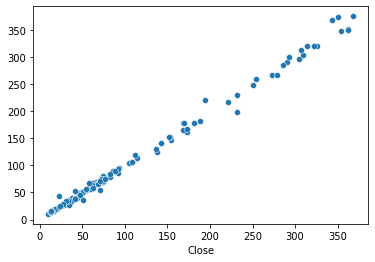

In [37]:
sns.scatterplot(target,train_prediced)